In [1]:
import torch
from model import *

In [2]:
model = ChessModel()
with open("results/exp_dev/model.pt", "rb") as model_file:
    model.load_state_dict(torch.load(model_file))
model

ChessModel(
  (hidden_layer): Linear(in_features=448, out_features=4096, bias=True)
  (output_layer): Linear(in_features=4096, out_features=4096, bias=True)
)

In [3]:
# load the data
from train import *
positions, valid_moves = load_data()

Loading data...
Loaded data. Shape: 
positions : torch.Size([10000, 7, 8, 8])
moves     : torch.Size([10000, 4096])


In [4]:
import chess
from chess_utils import action_to_move, move_to_action, board_to_tensor, tensor_to_board

In [5]:
from matplotlib import pyplot as plt

In [6]:
def plot_pos_tensor(tensor: torch.Tensor):
    fig, axs = plt.subplots(1, 7, figsize=(15, 5))
    channel_names = ['TURN', 'PAWN', 'KNIGHT', 'BISHOP', 'ROOK', 'QUEEN', 'KING']

    for i in range(7):
        axs[i].imshow(tensor[i, :, :], cmap='gray', vmin=-1, vmax=1, origin="lower")
        axs[i].set_title(channel_names[i])

    plt.show()


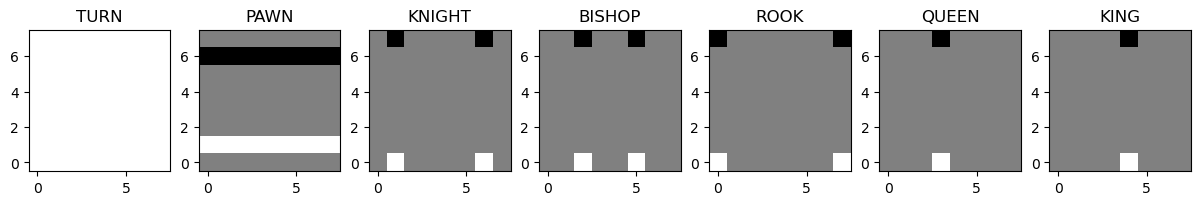

In [7]:
board = chess.Board()
tensor = board_to_tensor(board)
plot_pos_tensor(tensor)

In [8]:
moves_start = torch.zeros(64*64)
valid_actions_start = [move_to_action(move) for move in board.legal_moves]
moves_start[valid_actions_start] = 1
moves_start

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [9]:
def plot_move_set(moves: torch.tensor):
    moves_view = torch.zeros(64, 64)
    for start_row in range(8):
        for start_col in range(8):
            for end_row in range(8):
                for end_col in range(8):
                    action_num = (start_row+start_col*8)*64+(end_row+end_col*8)
                    moves_view[start_col*8+end_col][start_row*8+end_row] = moves[action_num]
    plt.imshow(moves_view, origin="lower")

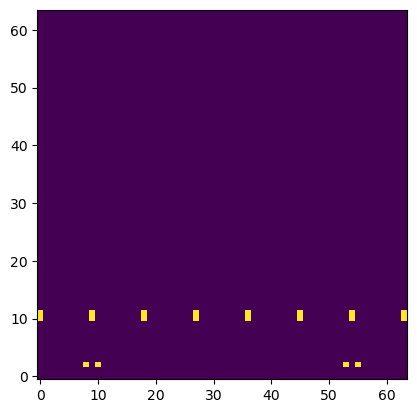

In [10]:
plot_move_set(moves_start)

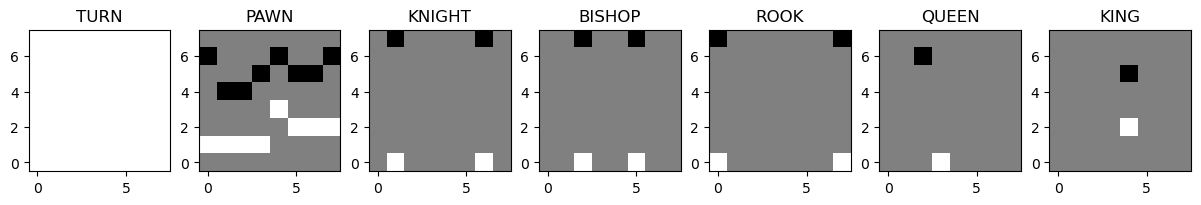

In [23]:
plot_pos_tensor(positions[20])

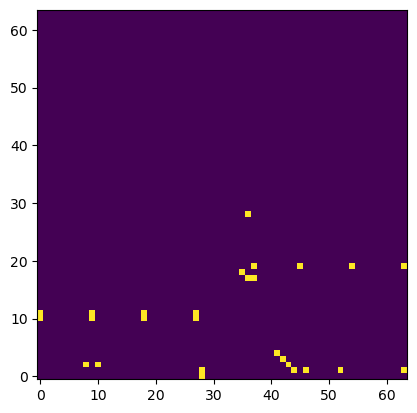

In [24]:
plot_move_set(valid_moves[20])

In [13]:
position = positions[0]
move_set = valid_moves[0]
print(position.shape, move_set.shape)

torch.Size([7, 8, 8]) torch.Size([4096])


In [19]:
for i in range(0,200,10):
    for l in range(7):
        print((positions[i][l] != 0).sum(), end=" ")
    print()

tensor(64) tensor(16) tensor(4) tensor(4) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(16) tensor(4) tensor(4) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(16) tensor(4) tensor(4) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(15) tensor(4) tensor(4) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(15) tensor(4) tensor(4) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(14) tensor(4) tensor(4) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(12) tensor(4) tensor(3) tensor(4) tensor(2) tensor(2) 
tensor(64) tensor(12) tensor(4) tensor(3) tensor(3) tensor(2) tensor(2) 
tensor(64) tensor(12) tensor(3) tensor(3) tensor(3) tensor(2) tensor(2) 
tensor(64) tensor(12) tensor(2) tensor(2) tensor(3) tensor(2) tensor(2) 
tensor(64) tensor(11) tensor(2) tensor(2) tensor(3) tensor(2) tensor(2) 
tensor(64) tensor(10) tensor(2) tensor(2) tensor(3) tensor(2) tensor(2) 
tensor(64) tensor(9) tensor(2) tensor(2) tensor(3) tensor(2) tensor(2) 
tensor(64) tensor(9) tensor(2) tensor(2) tensor(2) t